In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('housing.csv', index_col='id')
housing.reset_index(inplace=True)
housing.drop('id', inplace=True, axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_floats_no_target = housing.loc[:,housing.dtypes=='float64'].drop('median_house_value',axis=1)
housing_floats_no_target.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [4]:
housing_floats_no_target_corr = housing_floats_no_target.corr()
housing_floats_no_target_corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.010432,-0.042841,0.027778,0.036120,0.050929,0.031647,0.000711
latitude,-0.010432,1.000000,-0.009007,0.004204,0.004542,0.004031,0.004511,-0.015697
housing_median_age,-0.042841,-0.009007,1.000000,-0.361280,-0.320211,-0.295900,-0.303030,-0.117943
total_rooms,0.027778,0.004204,-0.361280,1.000000,0.930380,0.856635,0.918484,0.198050
total_bedrooms,0.036120,0.004542,-0.320211,0.930380,1.000000,0.877791,0.979728,-0.007723
population,0.050929,0.004031,-0.295900,0.856635,0.877791,1.000000,0.907201,0.004571
households,0.031647,0.004511,-0.303030,0.918484,0.979728,0.907201,1.000000,0.013033
median_income,0.000711,-0.015697,-0.117943,0.198050,-0.007723,0.004571,0.013033,1.000000


<AxesSubplot:>

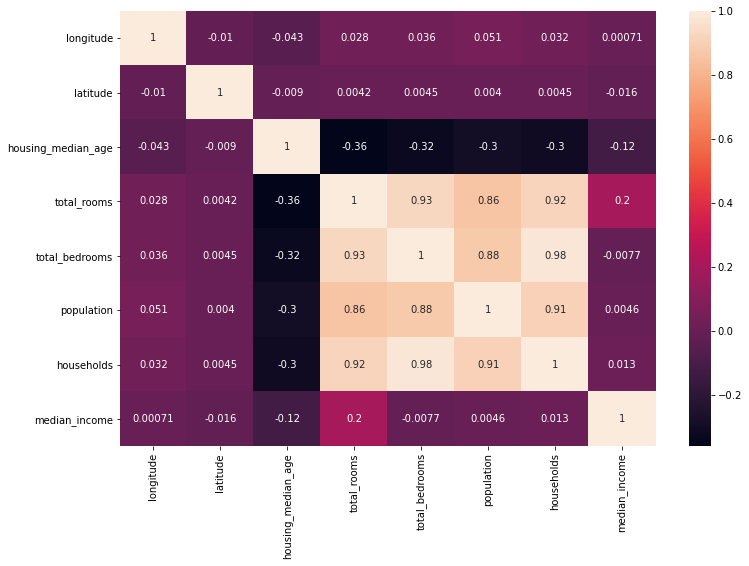

In [5]:
import seaborn as sn
plt.rcParams['figure.figsize'] = [12, 8]
sn.heatmap(housing_floats_no_target_corr, annot=True)

Видно очень сильную корреляцию между households и total_bedrooms, а также между households и total_rooms, households и population. Учитывая это, можно попробовать использовать только колонку households.

In [6]:
housing_floats_no_target_households = housing_floats_no_target.drop(['total_bedrooms', 'total_rooms', 'population'], axis=1)
housing_floats_no_target_households.head()

,longitude,latitude,housing_median_age,households,median_income
0,-122.23,37.88,41.0,126.0,8.3252
1,-122.22,37.86,21.0,1138.0,8.3014
2,-122.24,37.85,52.0,177.0,7.2574
3,-122.25,37.85,52.0,219.0,5.6431
4,-122.25,37.85,52.0,259.0,3.8462


In [7]:
X = housing_floats_no_target_households
y = housing.median_house_value
X['housing_median_age'].mode()

0    52.0
dtype: float64

In [8]:
X.loc[X['housing_median_age'].isna(),'housing_median_age']  = 52.0
X

,longitude,latitude,housing_median_age,households,median_income
0,-122.23,37.88,41.0,126.0,8.3252
1,-122.22,37.86,21.0,1138.0,8.3014
2,-122.24,37.85,52.0,177.0,7.2574
3,-122.25,37.85,52.0,219.0,5.6431
4,-122.25,37.85,52.0,259.0,3.8462
...,...,...,...,...,...
20635,-121.09,39.48,25.0,330.0,1.5603
20636,-121.21,39.49,18.0,114.0,2.5568
20637,-121.22,39.43,17.0,433.0,1.7000
20638,-121.32,39.43,18.0,349.0,1.8672


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

,longitude,latitude,housing_median_age,households,median_income
15961,-122.43,37.71,52.0,282.0,3.1908
1771,-122.35,37.95,52.0,303.0,3.6094
16414,-121.24,37.90,16.0,6.0,2.6250
5056,-118.35,34.02,34.0,1371.0,1.5143
8589,-118.39,33.89,38.0,314.0,7.3356
...,...,...,...,...,...
10955,-117.88,33.76,17.0,436.0,1.7823
17289,-119.63,34.42,42.0,260.0,8.5608
5192,-118.26,33.93,42.0,293.0,1.1326
12172,-117.16,33.73,10.0,477.0,2.6322


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=1)
model.fit(X_train, y_train.values)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=1)

In [12]:
y_pred = model.predict(X_test)
y_pred.shape

(4128,)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8059822383490847